In [1]:
import pandas as pd
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
plotly.offline.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt

# Input files

In [2]:
ip_path = "../../WAGO_3_IP/results/DE__N2_Input_Rpph__N2_xf119_Rpph/plot_small_RNAs/22G.tsv"
Dpf_3_S784A_path = "../../small_RNA_seq_15_C/results/DE__WT_dpf3__Dpf_3_S784A//plot_small_RNAs/22G.tsv"

# IP

In [3]:
# read in ip
ip = pd.read_csv(ip_path, header=0, sep="\t")
# Mark significants
ip["Significant"]  = "No"
ip.loc[(ip["FDR"] < 0.05) & (ip["logCPM"]>2), "Significant"] = "FDR<0.05\nlogCPM>2"
# set id as index
ip.set_index("id", inplace=True)
# rename columns
ip.columns = ip.columns + "_IP"
# reset index
ip.reset_index(inplace=True)

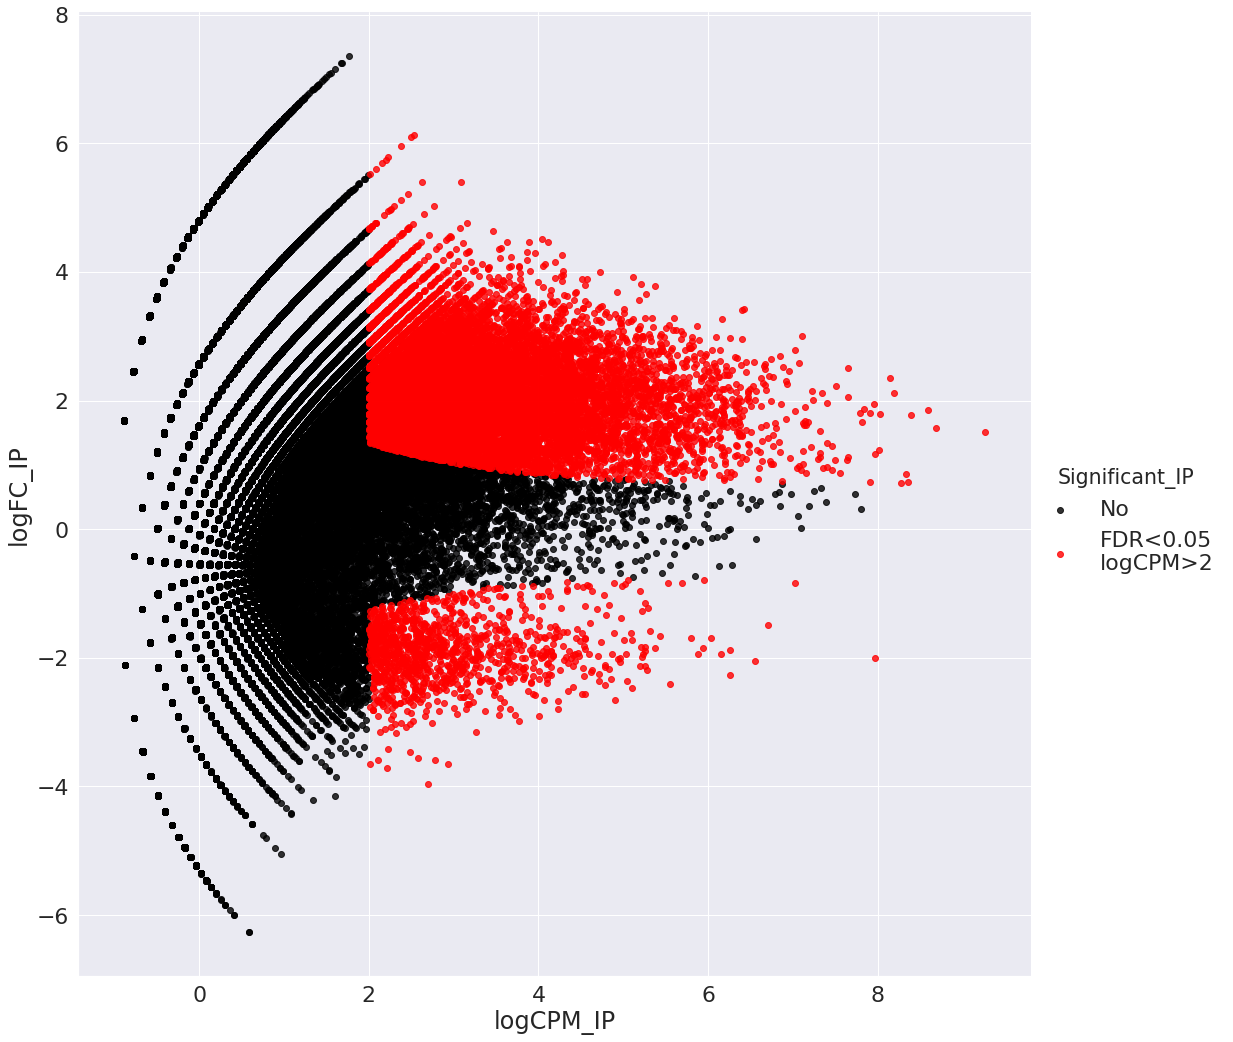

In [4]:
# plot
sns.set(font_scale=2)
sns_plot = sns.lmplot(x="logCPM_IP",
                      y="logFC_IP",
                      data=ip,
                      fit_reg=False,
                      hue="Significant_IP",
                      hue_order = ["No", "FDR<0.05\nlogCPM>2"],
                      palette=["black", "red"],
                      height=15,
                      aspect=1)
ax = plt.gca()

In [5]:
len(ip[ip["Significant_IP"] == "FDR<0.05\nlogCPM>2"])

14534

In [6]:
len(ip[(ip["Significant_IP"] == "FDR<0.05\nlogCPM>2") & (ip["logFC_IP"] >0)])

13409

# Dpf-3 S784A

In [8]:
# read in
Dpf_3_S784A = pd.read_csv(Dpf_3_S784A_path, header=0, sep="\t")
# Mark significants
Dpf_3_S784A["Significant"]  = "No"
Dpf_3_S784A.loc[(Dpf_3_S784A["FDR"] < 0.05) & (Dpf_3_S784A["logCPM"]>2), "Significant"] = "FDR<0.05\nlogCPM>2"
# set id as index
Dpf_3_S784A.set_index("id", inplace=True)
# rename columns
Dpf_3_S784A.columns = Dpf_3_S784A.columns + "_Dpf_3_S784A"
# reset index
Dpf_3_S784A.reset_index(inplace=True)

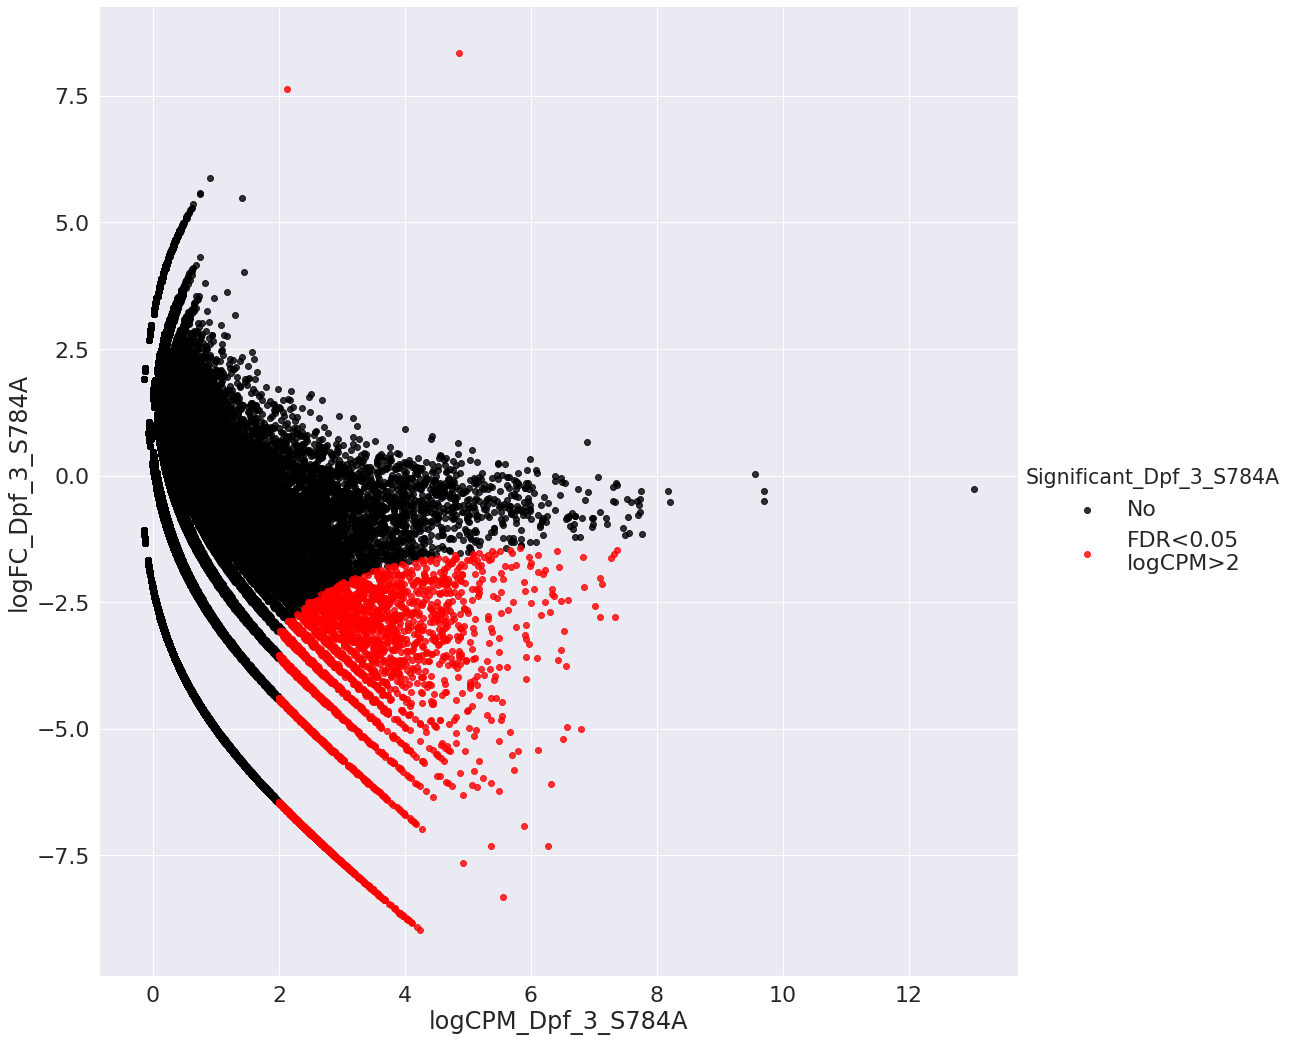

In [11]:
# plot
sns.set(font_scale=2)
sns_plot = sns.lmplot(x="logCPM_Dpf_3_S784A",
                      y="logFC_Dpf_3_S784A",
                      data=Dpf_3_S784A,
                      fit_reg=False,
                      hue="Significant_Dpf_3_S784A",
                      palette=["black", "red"],
                      height=15,
                      aspect=1)
ax = plt.gca()

In [12]:
len(Dpf_3_S784A[Dpf_3_S784A["Significant_Dpf_3_S784A"] == "FDR<0.05\nlogCPM>2"])

4060

In [15]:
len(Dpf_3_S784A[(Dpf_3_S784A["Significant_Dpf_3_S784A"] == "FDR<0.05\nlogCPM>2") & (Dpf_3_S784A["logFC_Dpf_3_S784A"] < 0)])

4058

# Compare lists

In [20]:
Dpf_3_S784A_selected_22G_RNAs = Dpf_3_S784A[(Dpf_3_S784A["Significant_Dpf_3_S784A"] == "FDR<0.05\nlogCPM>2") & (Dpf_3_S784A["logFC_Dpf_3_S784A"] < 0)]["id"].tolist()

In [21]:
IP_selected_22G_RNAs = ip[(ip["Significant_IP"] == "FDR<0.05\nlogCPM>2") & (ip["logFC_IP"] > 0)]["id"].tolist()

In [22]:
len(IP_selected_22G_RNAs), len(Dpf_3_S784A_selected_22G_RNAs)

(13409, 4058)

In [23]:
overlap = [value for value in Dpf_3_S784A_selected_22G_RNAs if value in IP_selected_22G_RNAs]

In [24]:
len(overlap)

2169

In [26]:
df_all = pd.merge(Dpf_3_S784A, ip, on="id")

In [27]:
df_all.head()

,id,logFC_Dpf_3_S784A,logCPM_Dpf_3_S784A,LR_Dpf_3_S784A,PValue_Dpf_3_S784A,FDR_Dpf_3_S784A,Significant_Dpf_3_S784A,logFC_IP,logCPM_IP,LR_IP,PValue_IP,FDR_IP,Significant_IP
0,GAAAAAAAAAACAAAGCTCGAA,2.128592,-0.119396,1.788443,0.181116,0.507588,No,1.687188,-0.882461,1.017153,0.313195,0.354921,No
1,GAAAAAAAAAAGAAACAGCGGA,0.955784,0.380094,0.432826,0.510605,0.539454,No,0.343680,-0.673423,0.059316,0.807581,0.819969,No
2,GAAAAAAAAAAGACAATCAGCC,-0.911141,0.462226,0.393208,0.530618,0.559862,No,-3.402899,-0.039708,11.613908,0.000655,0.032870,No
3,GAAAAAAAAAAGTCTTTGTAAA,-1.791509,-0.068715,0.890550,0.345328,0.507588,No,-0.422330,-0.773827,0.077384,0.780875,0.802629,No
4,GAAAAAAAAAAGTTTGTTCTGG,-2.178298,-0.009989,1.135294,0.286649,0.507588,No,2.453198,-0.774660,2.027180,0.154507,0.347469,No


In [283]:
df_all["Significant"] = "No"

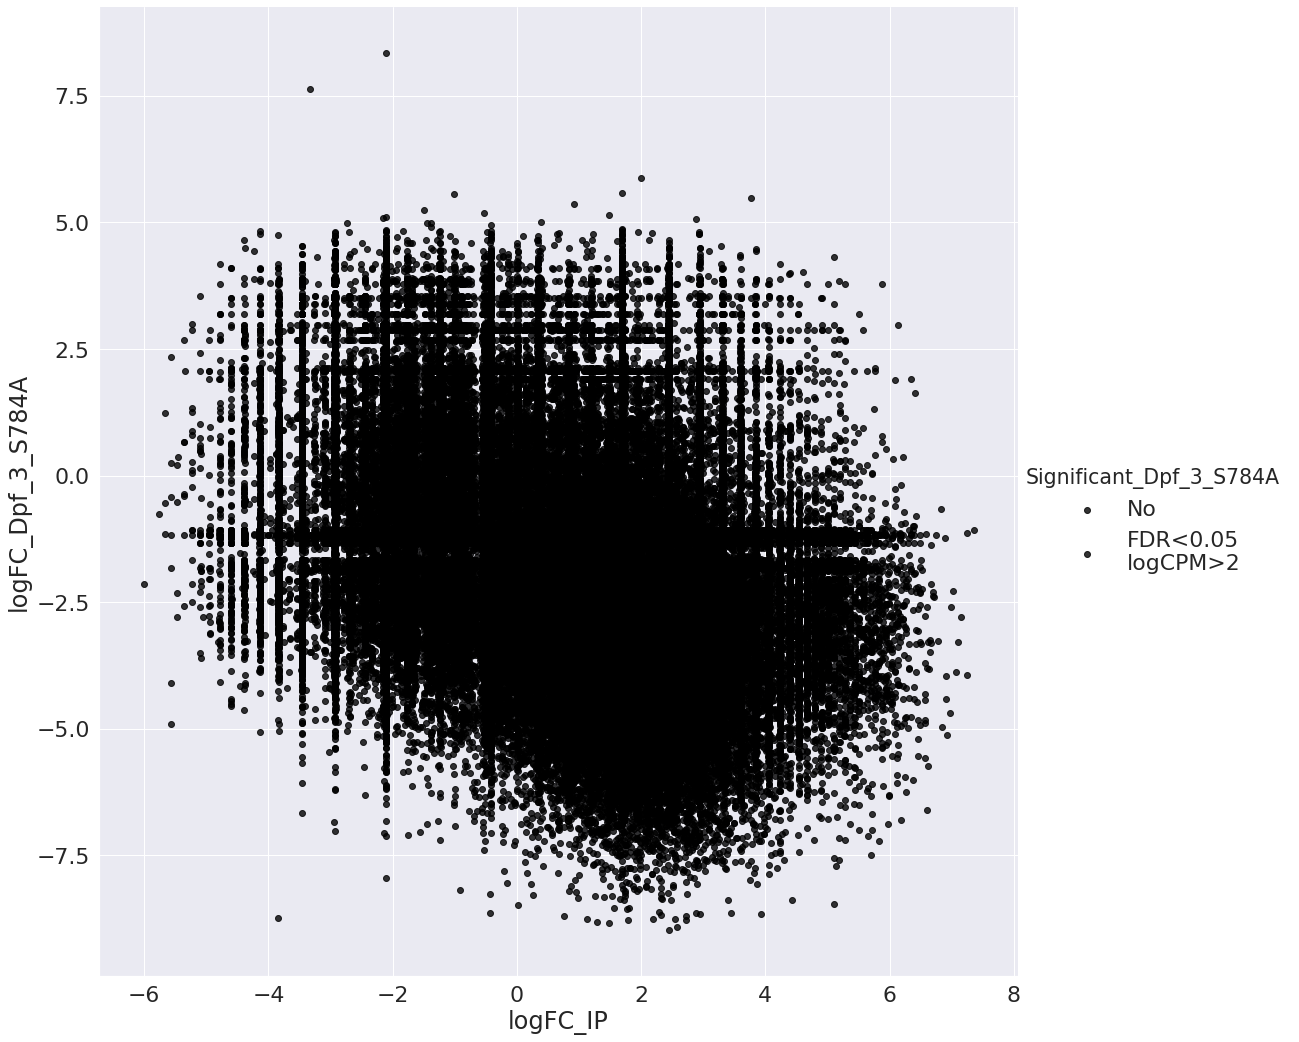

In [28]:
sns.set(font_scale=2)
sns_plot = sns.lmplot(x="logFC_IP",
                      y="logFC_Dpf_3_S784A",
                      data=df_all,
                      fit_reg=False,
                      hue="Significant_Dpf_3_S784A",
                      palette=["black"],
                      height=15,
                      aspect=1)
ax = plt.gca()

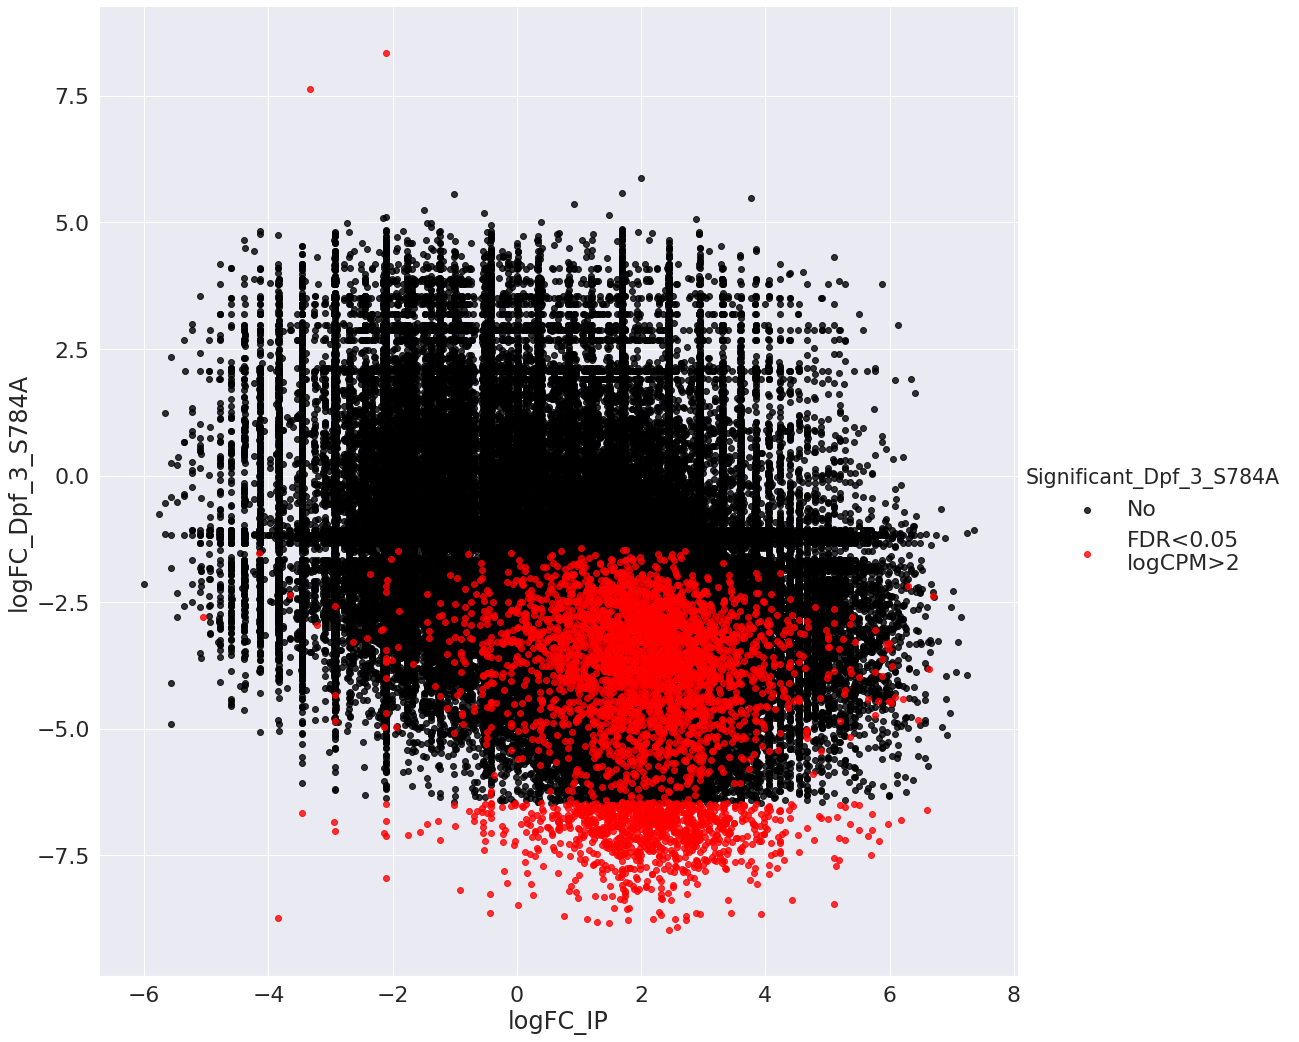

In [29]:
sns.set(font_scale=2)
sns_plot = sns.lmplot(x="logFC_IP",
                      y="logFC_Dpf_3_S784A",
                      data=df_all,
                      hue="Significant_Dpf_3_S784A",
                      fit_reg=False,
                      palette=["black", "red"],
                      height=15,
                      aspect=1)
ax = plt.gca()

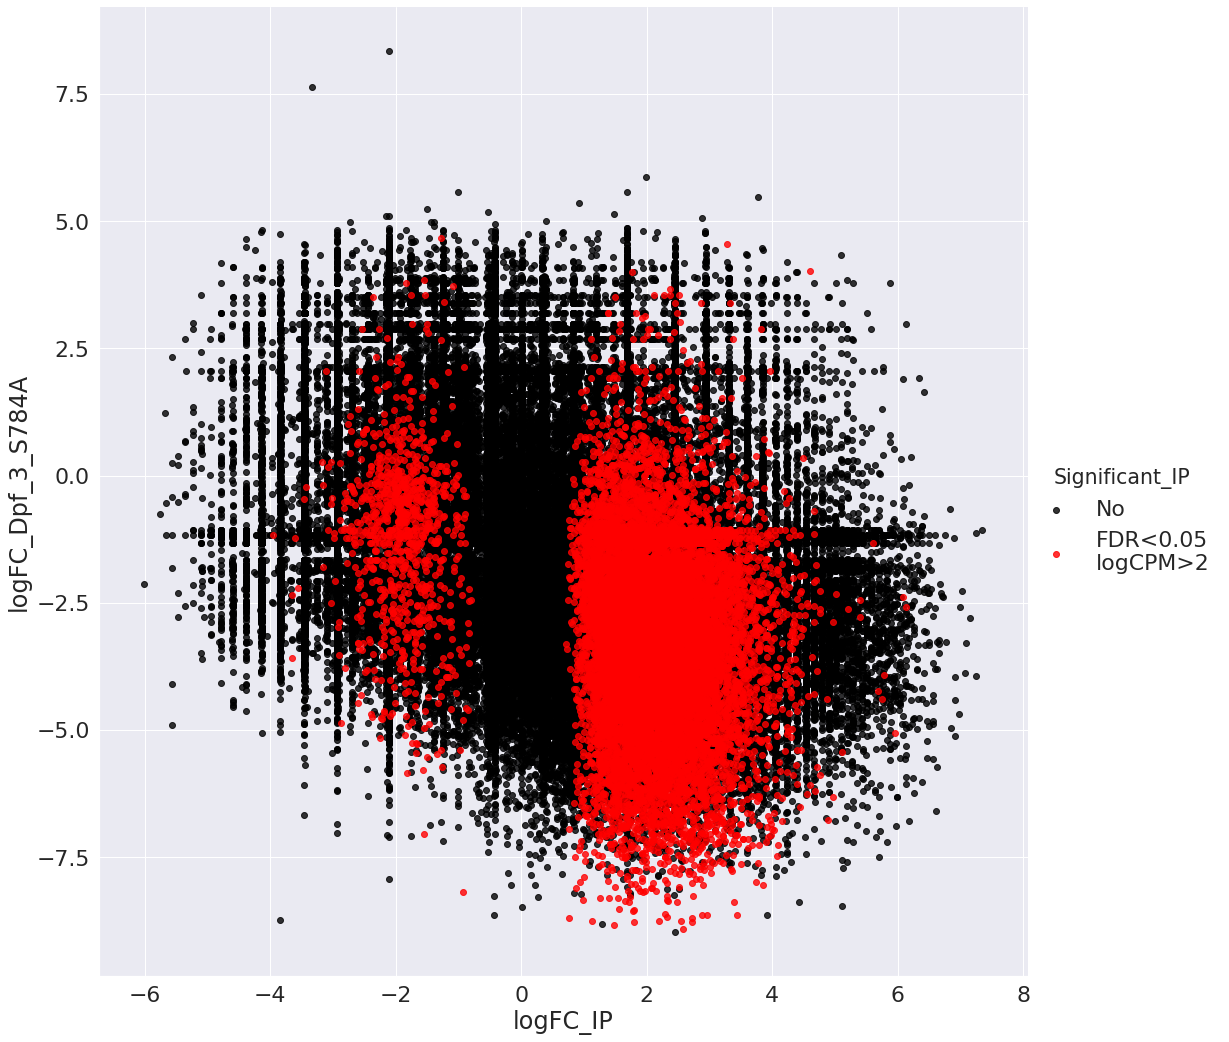

In [30]:
sns.set(font_scale=2)
sns_plot = sns.lmplot(x="logFC_IP",
                      y="logFC_Dpf_3_S784A",
                      data=df_all,
                      hue="Significant_IP",
                      fit_reg=False,
                      palette=["black", "red"],
                      height=15,
                      aspect=1)
ax = plt.gca()

In [31]:
df_all["Significant"] = "No"
df_all.loc[(df_all["FDR_IP"]<0.05) & 
           (df_all["FDR_Dpf_3_S784A"]<0.05) &
           (df_all["logFC_IP"]>0) &
           (df_all["logFC_Dpf_3_S784A"]<0) &
           (df_all["logCPM_IP"]>2) &
           (df_all["logCPM_Dpf_3_S784A"]>2)
           , "Significant"] = "FDR_IP<0.05\nFDR_Dpf_3_S784A<0.05\nlogFC_IP>0\nlogFC_Dpf_3_S784A<0\nlogCPM_IP>2\nlogCPM_Dpf_3_S784A>2"

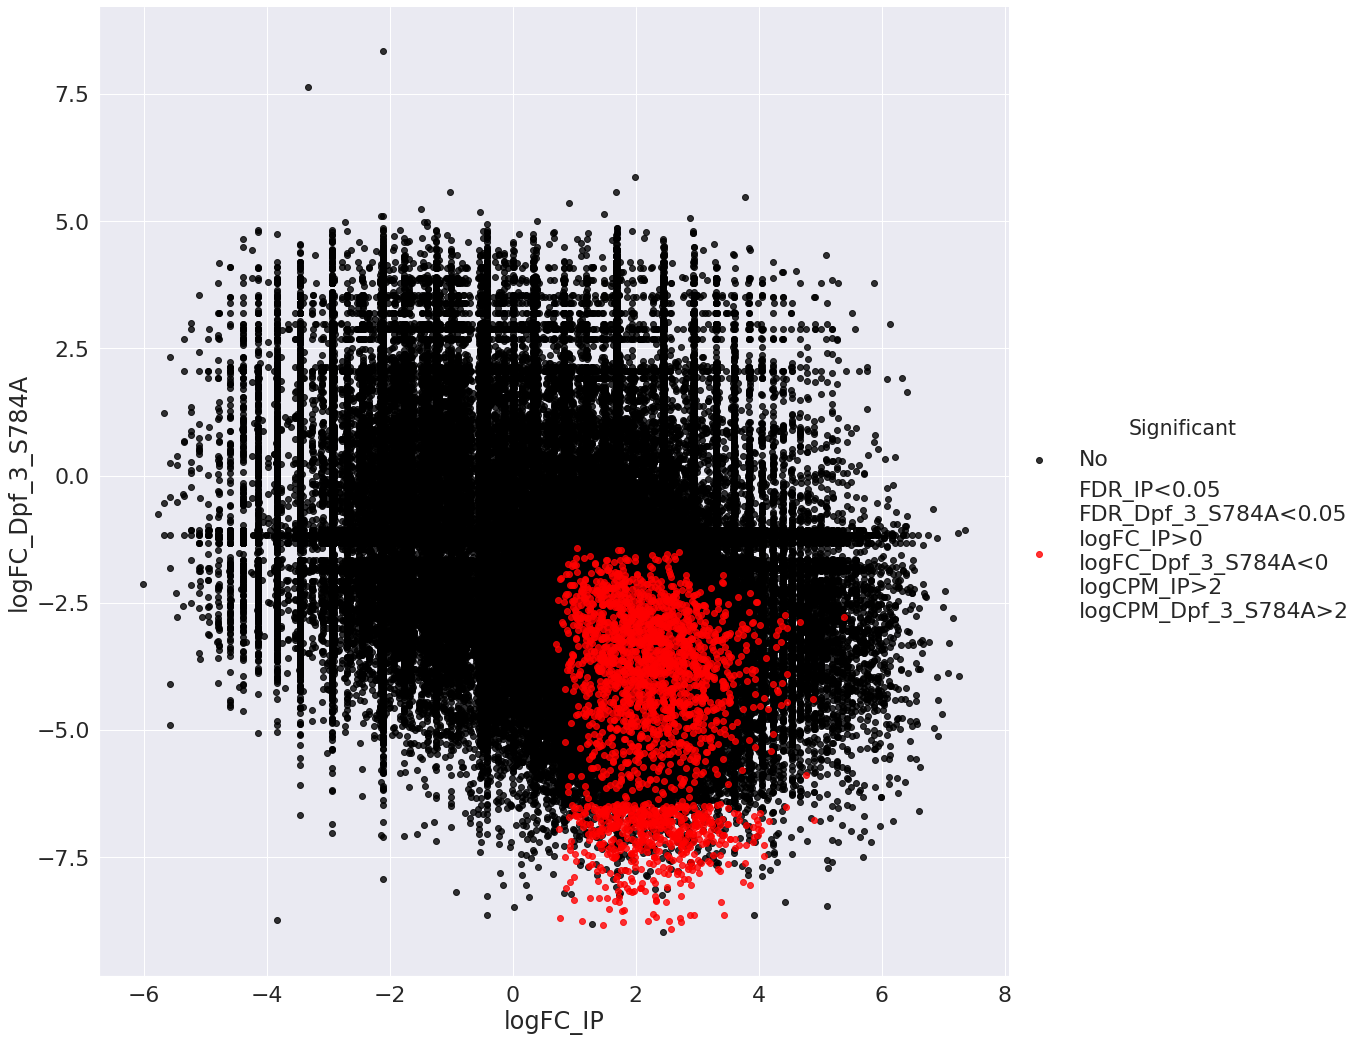

In [32]:
sns.set(font_scale=2)
sns_plot = sns.lmplot(x="logFC_IP",
                      y="logFC_Dpf_3_S784A",
                      data=df_all,
                      hue="Significant",
                      fit_reg=False,
                      palette=["black", "red"],
                      height=15,
                      aspect=1)
ax = plt.gca()

In [33]:
len(df_all[df_all["Significant"] != "No"]) 

2169